<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Задача:

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 


Цель исследования:

1) Провести исследование задачи  
2) Провести борьбу с дисбалансом  
3) Провести тестирование модели  

Ход исследования: 
Данные представлены в файле /datasets/Churn.csv.  
О качестве данных ничего неизвестно, поэтому перед проведением исследования понадобится обзор данных. Данные будут проверены на ошибки и будет оценено их влияние на исследование. Затем на этапе предобработки будет проведен поиск возможности исправления самых критичных ошибок данных.

Таким образом, исследование пройдет в 6 шагов:

Предобработка данных;  
Подготовка данных;  
Исслеование задачи;  
Борьба с дисбалансом;  
Тестирование модели;  
Общий вывод.

## Предобработка данных

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [58]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Итак, в таблице 14 столбцов.

Согласно документации к данным:
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак
* Exited — факт ухода клиента

В названиях колонок видны нарушения стиля:
1. Строчные буквы сочетаются с прописными.
2. Несколько слов не разделяются нижним подчеркиванием




In [59]:
 data.columns # перечень названий столбцов таблицы df

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Приведем названия в соответствие с хорошим стилем:
* несколько слов в названии запишем в «змеином_регистре»,
* все символы сделаем строчными.

Для этого переименуем колонки так:

In [60]:
data = data.rename(columns = {'RowNumber': 'row_number','CustomerId': 'customer_id', 
                              'Surname': 'surname', 'CreditScore': 'credit_score', 'Geography': 'geography', 
                              'Gender': 'gender', 'Age': 'age', 'Tenure': 'tenure', 'Balance': 'balance',
                             'NumOfProducts': 'num_of_products', 'HasCrCard': 'has_cr_card', 'IsActiveMember': 'is_active_member',
                              'EstimatedSalary': 'estimated_salary', 'Exited': 'exited'})# переименование столбцов
display(data.columns) # проверка результатов - перечень названий столбцов

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Проверим наличие в данных пропущенных значений.

In [61]:
data.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [62]:
data['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [63]:
for s in data['surname'].sort_values().unique():
    print(s)

Abazu
Abbie
Abbott
Abdullah
Abdulov
Abel
Abernathy
Abramov
Abramova
Abramovich
Abramowitz
Abrego
Abron
Achebe
Adams
Adamson
Afamefula
Afamefuna
Afanasyev
Afanasyeva
Agafonova
Aguirre
Ah Mouy
Ahern
Ahmed
Aiken
Aikenhead
Ainsworth
Aitken
Ajuluchukwu
Akabueze
Akeroyd
Akhtar
Akobundu
Aksakova
Aksenov
Aksenova
Aksyonov
Aksyonova
Akubundu
Akudinobi
Alaniz
Alderete
Aldrich
Aldridge
Aleksandrova
Alekseeva
Alekseyeva
Aleshire
Alexander
Alexandrov
Alexandrova
Alexeeva
Alexeieva
Alexeyeva
Algarin
Algeranoff
Ali
Aliyev
Aliyeva
Allan
Allard
Allardyce
Allen
Alley
Alleyne
Allingham
Allnutt
Allsop
Alvares
Alvarez
Amadi
Amaechi
Amechi
Amies
Amos
Ampt
Anayochukwu
Anayolisa
Andersen
Anderson
Andreev
Andrejew
Andrews
Andreyev
Andreyeva
Anenechi
Anenechukwu
Angel
Angelo
Ankudinov
Ankudinova
Ann
Ansell
Anthony
Aparicio
Arbour
Archambault
Archer
Arcuri
Ardis
Argyle
Arkwookerum
Armfield
Armit
Armstrong
Arnold
Arnott
Arrington
Artamonova
Artemiev
Artemieva
Artemova
Artemyeva
Arthur
Artyomova
Ash
Ashbolt
Asher


Maclean
Macleod
Macnamara
Maconochie
Macrossan
Mactier
Macvitie
Madison
Maduabuchim
Madueke
Madukaego
Madukaife
Madukwe
Maggard
Maher
Mahmood
Mahomed
Mahon
Mai
Mairinger
Maitland
Major
Malloy
Mamelu
Mancini
Manfrin
Mann
Manna
Manners
Manning
Mansom
Mao
Marcelo
Marchesi
Marcum
Marcus
Marian
Marino
Mario
Marks
Marquez
Marrero
Marsden
Marsh
Marshall
Marshall-Hall
Martel
Martin
Martinez
Maruff
Mashman
Maslov
Maslova
Maslow
Mason
Massie
Mathews
Matlock
Matthews
Matthias
Matveyev
Matveyeva
Maughan
Mauldon
Mault
Maurer
Maxwell
May
Maynard
Mayne
Mayrhofer
Mays
Mazure
Mazzanti
Mazzi
Mbadiwe
Mbanefo
McBurney
McCaffrey
McCall
McCane
McCardle
McCarthy
McCartney
McCawley
McChesney
McClaran
McClemans
McClinton
McCollum
McConnell
McCulloch
McDaniels
McDavid
McDonald
McDowell
McElhone
McElroy
McElyea
McEncroe
McEwan
McFarland
McGarry
McGill
McGregor
McGuffog
McGuigan
McGuirk
McIntosh
McIntyre
McIver
McKay
McKee
McKelvey
McKenzie
McKinley
McKinnon
McKissick
McLachlan
McLean
McMasters
McMillan
McMinn
Mc

In [64]:
data.duplicated().sum()

0

In [65]:
#создадим функцию, получющую на вход название признака, и возвращающую процент пропущенных значений
def print_nan_ratio(column):
    print('В {0} пропущено {1} значений'.format(column, "{:.2%}".format((len(data) - data[column].count())/len(data))))
print_nan_ratio('tenure')

В tenure пропущено 9.09% значений


Поскольку пропущено меньше 10% значений, принято решение удалить все строки с пропущенными значениями.

In [66]:
data['tenure'] = data['tenure'].fillna(np.random.choice(data['tenure']))#
data['tenure'].isna().sum()

0

In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


***Вывод***

Итак в таблице 14 столбцов:
* row_number — индекс строки в данных
* customer_id — уникальный идентификатор клиента
* surname — фамилия
* credit_score — кредитный рейтинг
* geography — страна проживания
* gender — пол
* age — возраст
* tenure — сколько лет человек является клиентом банка
* balance — баланс на счёте
* num_of_products — количество продуктов банка, используемых клиентом
* has_cr_card — наличие кредитной карты
* is_active_member — активность клиента
* estimated_salary — предполагаемая зарплата

Целевой признак
* exited — факт ухода клиента

1) В названиях колонок устранены нарушения стиля, названия колонок привели в соответствие с хорошим стилем:
* несколько слов в названии записали в «змеином_регистре»,
* все символы сделали строчными.

2) В стобце tenure устранены пропущенные значения. Принято решение заменить строки с пропущенными значениями на рандомные значения столбца data['tenure'].

## Подготовка данных

In [68]:
#проведем порядковое кодирование метоодом OrdinalEncoder()
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data),
                            columns=data.columns)
data_ordinal.head(15)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,0.0,2736.0,1115.0,228.0,0.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,5068.0,1.0
1,1.0,3258.0,1177.0,217.0,2.0,0.0,23.0,1.0,743.0,0.0,0.0,1.0,5639.0,0.0
2,2.0,2104.0,2040.0,111.0,0.0,0.0,24.0,8.0,5793.0,2.0,1.0,0.0,5707.0,1.0
3,3.0,5435.0,289.0,308.0,0.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4704.0,0.0
4,4.0,6899.0,1822.0,459.0,2.0,0.0,25.0,2.0,3696.0,0.0,1.0,1.0,3925.0,0.0
5,5.0,312.0,537.0,254.0,2.0,1.0,26.0,8.0,2674.0,1.0,1.0,0.0,7531.0,1.0
6,6.0,1058.0,177.0,431.0,0.0,1.0,32.0,7.0,0.0,1.0,1.0,1.0,513.0,0.0
7,7.0,3589.0,2000.0,8.0,1.0,0.0,11.0,4.0,2781.0,3.0,1.0,0.0,5978.0,1.0
8,8.0,9066.0,1146.0,110.0,0.0,1.0,26.0,4.0,4962.0,1.0,0.0,1.0,3718.0,0.0
9,9.0,1054.0,1081.0,293.0,0.0,1.0,9.0,2.0,4450.0,0.0,1.0,1.0,3550.0,0.0


In [69]:
target = data_ordinal['exited']
features = data_ordinal.drop('exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)


In [70]:
 #оставим для нормализации только столбцы, которые требуют дальнейшей нормализации 
numeric = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] =scaler.transform(features_valid[numeric])

pd.options.mode.chained_assignment = None
print(features_train.head())


      row_number  customer_id   surname  credit_score  geography  gender  \
226    -1.642934     1.154127 -1.255320      0.442946  -0.903514     0.0   
7756    0.961172    -1.180111 -0.365692     -0.311975   1.513160     0.0   
2065   -1.006951    -1.520441 -0.959954     -0.260268  -0.903514     1.0   
2800   -0.752766    -0.612893 -1.198835      1.218550  -0.903514     1.0   
7028    0.709407    -1.014787  0.449800      0.691140   0.304823     1.0   

           age    tenure   balance  num_of_products  has_cr_card  \
226  -0.841540  1.404714 -0.954573         0.817772          1.0   
7756 -0.270755  0.681554  0.409643        -0.896874          1.0   
2065 -0.556148  1.043134 -0.954573         0.817772          1.0   
2800  1.156208  1.404714  1.731050         0.817772          1.0   
7028 -1.222064  0.319974  1.530652        -0.896874          0.0   

      is_active_member  estimated_salary  
226                1.0         -1.271910  
7756               1.0          0.959687  
2065 

***Вывод***  
Провели порядковое кодирование методом OrdinalEncoder().
Для нормализации оставили только столбцы, которые требуют дальнейшей нормализации. 


## Исследование задачи

In [71]:
#найдем оптимальную глубину дерева в модели DecisionTreeClassifier
best_depth = 0
best_model = None
best_result = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth= depth) 
    # обучим модель с заданной глубиной дерева
    model.fit(features, target) # обучим модель
    predictions = model.predict(features) # получим предсказания модели
    result = accuracy_score(target, predictions) # посчитаем качество модели
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
        
print("Accuracy лучшей модели:", best_result, "Глубина дерева:", best_depth)

Accuracy лучшей модели: 0.9931 Глубина дерева: 19


In [72]:
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth= 19) 
model_dtc.fit(features_train, target_train)
predicted_valid_dtc = model_dtc.predict(features_valid)

precision_dtc = precision_score(target_valid, predicted_valid_dtc)# 
recall_dtc = recall_score(target_valid, predicted_valid_dtc)# 
f1_dtc = (2*precision_dtc*recall_dtc)/(precision_dtc+recall_dtc)# 
confusion_matrix_dtc= confusion_matrix(target_valid, predicted_valid_dtc)

probabilities_valid_dtc = model_dtc.predict_proba(features_valid)
probabilities_one_valid_dtc = probabilities_valid_dtc[:, 1]
auc_roc_dtc = roc_auc_score(target_valid, probabilities_one_valid_dtc)  

table_dtc = pd.DataFrame({'model_name':['DesicionTreeClassifier'],'Полнота':[recall_dtc],
                          'Точность':[precision_dtc], 'F1-мера':[f1_dtc], 'AUC-ROC':[auc_roc_dtc]})

print("Матрица ошибок:", confusion_matrix_dtc)#
print("Полнота:", recall_dtc)
print("Точность:", precision_dtc)
print("F1-мера:", f1_dtc)
print("AUC-ROC:", auc_roc_dtc)

Матрица ошибок: [[1724  241]
 [ 284  251]]
Полнота: 0.4691588785046729
Точность: 0.5101626016260162
F1-мера: 0.48880233690360275
AUC-ROC: 0.6793108368409788


In [73]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train)
predicted_valid_lr = model_lr.predict(features_valid)

precision_lr = precision_score(target_valid, predicted_valid_lr)# 
recall_lr = recall_score(target_valid, predicted_valid_lr)# 
f1_lr = (2*precision_lr*recall_lr)/(precision_lr+recall_lr)# 
confusion_matrix_lr = confusion_matrix(target_valid, predicted_valid_lr)

probabilities_valid_lr = model_lr.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)

table_lr = pd.DataFrame({'model_name':['LogisticRegression'],'Полнота':[recall_lr], 
                         'Точность':[precision_lr], 'F1-мера':[f1_lr], 'AUC-ROC':[auc_roc_lr]})



print("Матрица ошибок:", confusion_matrix_lr)#
print("Полнота:", recall_lr)
print("Точность:", precision_lr)
print("F1-мера:", f1_lr)
print("AUC-ROC:", auc_roc_lr)

Матрица ошибок: [[1911   54]
 [ 450   85]]
Полнота: 0.1588785046728972
Точность: 0.6115107913669064
F1-мера: 0.2522255192878338
AUC-ROC: 0.7435057430263252


In [74]:
from itertools import product
import tqdm
def RandomForestQuality(features_train, target_train):
    max_depth = [i for i in range(10, 20)]
    depth_table = []
    n_estimators_table = []
    f1_table = []
    recall_table = []
    precision_table = []
    myproduct = product(max_depth, [i for i in range(30, 100,10)])#
    for p in tqdm.tqdm(myproduct):
        
        model_rfc = RandomForestClassifier(max_depth=p[0], n_estimators=p[1], random_state=12345)
        model_rfc.fit(features_train, target_train)
        prediction_valid_rfc = model_rfc.predict(features_valid)
        precision_rfc = precision_score(target_valid, prediction_valid_rfc)# 
        recall_rfc = recall_score(target_valid, prediction_valid_rfc)# 
        f1 = (2*precision_rfc*recall_rfc)/(precision_rfc+recall_rfc)# 
        
        depth_table.append(p[0])
        n_estimators_table.append(p[1])
        f1_table.append(f1)
        recall_table.append(recall_rfc)
        precision_table.append(precision_rfc)
        
    quality_table = pd.DataFrame({'max_depth':depth_table,
                                  'n_estimators':n_estimators_table,
                                  'f1':f1_table,
                                  'recall':recall_table,
                                  'precision':precision_table})
    
    return quality_table
quality_table = RandomForestQuality(features_train, target_train)

70it [01:14,  1.06s/it]


In [75]:
display(quality_table.sort_values(by='f1', ascending=False).head(20))# Выводим в табличном виде значения параметров, чтобы вырать наилучшую модель

,max_depth,n_estimators,f1,recall,precision
56,18,30,0.549878,0.422430,0.787456
59,18,60,0.549261,0.416822,0.805054
60,18,70,0.548826,0.414953,0.810219
58,18,50,0.546780,0.420561,0.781250
65,19,50,0.546330,0.424299,0.766892
50,17,40,0.545232,0.416822,0.787986
62,18,90,0.545229,0.411215,0.808824
66,19,60,0.545012,0.418692,0.780488
24,13,60,0.544785,0.414953,0.792857
57,18,40,0.544785,0.414953,0.792857


In [76]:
model_rfc = RandomForestClassifier(random_state=12345, max_depth=19, n_estimators=90)
model_rfc.fit(features_train, target_train)
predicted_valid_rfc = model_rfc.predict(features_valid)
precision_rfc = precision_score(target_valid, predicted_valid_rfc)# 
recall_rfc = recall_score(target_valid, predicted_valid_rfc)# 
f1_rfc = (2*precision_rfc*recall_rfc)/(precision_rfc+recall_rfc)# 
confusion_matrix_rfc = confusion_matrix(target_valid, predicted_valid_rfc)

probabilities_valid_rfc = model_rfc.predict_proba(features_valid)
probabilities_one_valid_rfc = probabilities_valid_rfc[:, 1]
auc_roc_rfc = roc_auc_score(target_valid, probabilities_one_valid_rfc)  

table_rfc = pd.DataFrame({'model_name':['RandomForestClassifier'],'Полнота':[recall_rfc], 
                          'Точность':[precision_rfc], 'F1-мера':[f1_rfc], 'AUC-ROC':[auc_roc_rfc]})
print("Матрица ошибок:", confusion_matrix_rfc)#
print("Полнота:", recall_rfc)
print("Точность:", precision_rfc)
print("F1-мера:", f1_rfc)
print("AUC-ROC:", auc_roc_rfc)

Матрица ошибок: [[1899   66]
 [ 314  221]]
Полнота: 0.4130841121495327
Точность: 0.7700348432055749
F1-мера: 0.537712895377129
AUC-ROC: 0.8471413283869587


0    0.7963
1    0.2037
Name: exited, dtype: float64


<AxesSubplot:>

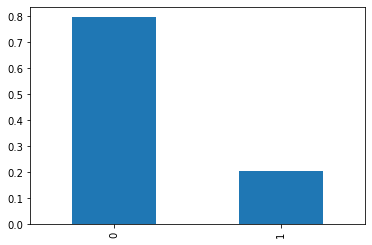

In [77]:
class_frequency = data['exited'].value_counts(normalize=True)# 
print(class_frequency)
class_frequency.plot(kind='bar')

In [78]:
table_sum = pd.concat([table_rfc,table_dtc, table_lr])
table_sum = table_sum.reset_index()[['model_name', 'Полнота', 'Точность','F1-мера', 'AUC-ROC']]
table_sum.sort_values(by='F1-мера')

,model_name,Полнота,Точность,F1-мера,AUC-ROC
2,LogisticRegression,0.158879,0.611511,0.252226,0.743506
1,DesicionTreeClassifier,0.469159,0.510163,0.488802,0.679311
0,RandomForestClassifier,0.413084,0.770035,0.537713,0.847141


***Вывод***  

Как видно из данных, показатель Полнота у моделей DesicionTreeClassifier и LogisticRegression сильно ниже показателя Точность, а мера F1 далеко от 1. 

Указанное может говорить о несбалансированности классификации.

Сбалансируем классы техниками взвешивания классов, upsampling  и downsampling.


## Борьба с дисбалансом

In [ ]:
from itertools import product
import tqdm
def RandomForestQuality(features_train, target_train, features_valid, target_valid):
    class_weight = ['balanced', 'balanced_subsample', None]
    max_depth = [i for i in range(10, 20)]
    class_weight_table = []
    depth_table = []
    n_estimators_table = []
    f1_table = []
    recall_table = []
    precision_table = []
    myproduct = product(class_weight, max_depth, [i for i in range(80, 100,2)])#
    for p in tqdm.tqdm(myproduct):
        
        model_rfc=RandomForestClassifier(class_weight=p[0],
                                     max_depth=p[1], n_estimators=p[2], random_state=12345)#
        model_rfc.fit(features_train, target_train)
        prediction_valid_rfc = model_rfc.predict(features_valid)
        precision_rfc = precision_score(target_valid, prediction_valid_rfc)# 
        recall_rfc = recall_score(target_valid, prediction_valid_rfc)# 
        f1 = (2*precision_rfc*recall_rfc)/(precision_rfc+recall_rfc)# 
        
        class_weight_table.append(p[0])
        depth_table.append(p[1])
        n_estimators_table.append(p[2])
        f1_table.append(f1)
        recall_table.append(recall_rfc)
        precision_table.append(precision_rfc)
        
    quality_table = pd.DataFrame({'class_waight':class_weight_table,
                                  'max_depth':depth_table,
                                  'n_estimators':n_estimators_table,
                                  'f1':f1_table,
                                  'recall':recall_table,
                                  'precision':precision_table})
    
    return quality_table
quality_table = RandomForestQuality(features_train, target_train, features_valid, target_valid)

10it [00:13,  1.53s/it]

In [ ]:
display(quality_table.sort_values(by='f1', ascending=False).head(20))


In [ ]:
model_rfc_final = RandomForestClassifier(max_depth=10, n_estimators=82, class_weight="balanced", random_state=12345)
model_rfc_final.fit(features_train, target_train)
predicted_valid_rfc_f = model_rfc_final.predict(features_valid)
precision_rfc_f = precision_score(target_valid, predicted_valid_rfc_f)# 
recall_rfc_f = recall_score(target_valid, predicted_valid_rfc)# 
f1_rfc_f = (2*precision_rfc_f*recall_rfc_f)/(precision_rfc_f+recall_rfc_f)# 
confusion_matrix_rfc_f = confusion_matrix(target_valid, predicted_valid_rfc_f)

auc_roc_rfc_f = roc_auc_score(target_valid, predicted_valid_rfc_f)  

table_rfc = pd.DataFrame({'model_name':['RandomForestClassifier'], 'Полнота':[recall_rfc_f],
                            'Точность':[precision_rfc_f], 'F1-мера':[f1_rfc_f], 'AUC-ROC':[auc_roc_rfc_f]})

print("Матрица ошибок:", confusion_matrix_rfc_f)#
print("Полнота:", recall_rfc_f)
print("Точность:", precision_rfc_f)
print("F1-мера:", f1_rfc_f)
print("AUC-ROC:", auc_roc_rfc_f)

In [ ]:
# с помощью техники upsampling сбалансируем классы путём увеличения их числа
def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    repeat = round(len(features_zeros) / len(features_ones))
    print(repeat)
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled_train, target_upsampled_train = upsample(features_train, target_train)

print(features_upsampled_train.shape)

print(target_upsampled_train.shape)

class_frequency = target_upsampled_train.value_counts(normalize=True)# 
print(class_frequency)
class_frequency.plot(kind='bar')

In [ ]:
# обучим модель DesicionTreeClassifier и получим предсказания на новой выборке,
#увеличенной с помощью техники upsampling
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth= 19) 
model_dtc.fit(features_upsampled_train, target_upsampled_train)

predicted_upsampled_valid_dtc = model_dtc.predict(features_valid)

precision_dtc_up = precision_score(target_valid, predicted_upsampled_valid_dtc)# 
recall_dtc_up = recall_score(target_valid, predicted_upsampled_valid_dtc)# 
f1_dtc_up = (2*precision_dtc_up*recall_dtc_up)/(precision_dtc_up+recall_dtc_up)# 
confusion_matrix_dtc_up = confusion_matrix(target_valid, predicted_upsampled_valid_dtc)

auc_roc_dtc_up = roc_auc_score(target_valid, predicted_upsampled_valid_dtc)  

table_dtc_up = pd.DataFrame({'model_name':['DesicionTreeClassifier_upsampled'],'Полнота':[recall_dtc_up], 
                             'Точность':[precision_dtc_up], 'F1-мера':[f1_dtc_up], 'AUC-ROC':[auc_roc_dtc_up]})
print("Матрица ошибок:\n", confusion_matrix_dtc_up)#
print("Полнота:", recall_dtc_up)
print("Точность:", precision_dtc_up)
print("F1-мера:", f1_dtc_up)
print("AUC-ROC:", auc_roc_dtc_up)

In [ ]:
# обучим модель LogisticRegression и получим предсказания на новой выборке,
#увеличенной с помощью техники upsampling
model_lr.fit(features_upsampled_train, target_upsampled_train)
predicted_upsampled_valid_lr = model_lr.predict(features_valid)

precision_lr_up = precision_score(target_valid, predicted_upsampled_valid_lr)# 
recall_lr_up = recall_score(target_valid, predicted_upsampled_valid_lr)# 
f1_lr_up = (2*precision_lr_up*recall_lr_up)/(precision_lr_up+recall_lr_up)# 
confusion_matrix_lr_up = confusion_matrix(target_valid, predicted_upsampled_valid_lr)
auc_roc_lr_up = roc_auc_score(target_valid, predicted_upsampled_valid_lr)  

table_lr_up = pd.DataFrame({'model_name':['LogisticRegression_upsampled'], 'Полнота': [recall_lr_up],
                            'Точность':[precision_lr_up], 'F1-мера':[f1_lr_up], 'AUC-ROC':[auc_roc_lr_up]})


print("Матрица ошибок:\n", confusion_matrix_lr_up)#
print("Полнота:", recall_lr_up)
print("Точность:", precision_lr_up)
print("F1-мера:", f1_lr_up)
print("AUC-ROC:", auc_roc_lr_up)

In [ ]:
# обучим модель RandomForestClassifier и получим предсказания на новой выборке,
#увеличенной с помощью техники upsampling
model_rfc = RandomForestClassifier(max_depth = 10, n_estimators=82, random_state=12345)
model_rfc.fit(features_upsampled_train, target_upsampled_train)
predicted_upsampled_valid_rfc = model_rfc.predict(features_valid)
precision_rfc_up = precision_score(target_valid, predicted_upsampled_valid_rfc)# 
recall_rfc_up = recall_score(target_valid, predicted_upsampled_valid_rfc)# 
f1_rfc_up = (2*precision_rfc_up*recall_rfc_up)/(precision_rfc_up+recall_rfc_up)# 
confusion_matrix_rfc_up = confusion_matrix(target_valid, predicted_upsampled_valid_rfc)

auc_roc_rfc_up = roc_auc_score(target_valid, predicted_upsampled_valid_rfc)  

table_rfc_up = pd.DataFrame({'model_name':['RandomForestClassifier_upsampled'], 'Полнота':[recall_rfc_up],
                            'Точность':[precision_rfc_up], 'F1-мера':[f1_rfc_up], 'AUC-ROC':[auc_roc_rfc_up]})

print("Матрица ошибок:", confusion_matrix_rfc_up)#
print("Полнота:", recall_rfc_up)
print("Точность:", precision_rfc_up)
print("F1-мера:", f1_rfc_up)
print("AUC-ROC:", auc_roc_rfc_up)

In [ ]:
# обобщим данные метрик классификации в одну таблицу
table_sum = pd.concat([table_rfc_up, table_dtc_up,  
                       table_lr_up])
table_sum = table_sum.reset_index()[['model_name', 'Полнота', 'Точность','F1-мера', 'AUC-ROC']]
table_sum.sort_values(by='F1-мера')

Как видно из данных в таблице, наилучшый результат после сбалансирования данных техникой upsampling у модели RandomForestClassifier, F1-мера которого 0.619621

In [ ]:
# с помощью техники downsampling сбалансируем классы 
#путём удаления части объектов большего класса
def downsample(features_train, target_train, fraction):
    features_zeros = features_train[target == 0]
    features_ones = features_train[target == 1]
    target_zeros = target_train[target == 0]
    target_ones = target_train[target == 1]

    features_downsampled_train = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled_train = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled_train, target_downsampled_train = shuffle(
        features_downsampled_train, target_downsampled_train, random_state=12345)
    
    return features_downsampled_train, target_downsampled_train

features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, 0.25)
print(features_downsampled_train.shape)
print(target_downsampled_train.shape)

class_frequency = target_downsampled_train.value_counts(normalize=True)# 
print(class_frequency)
class_frequency.plot(kind='bar')

In [ ]:
# обучим модель DesicionTreeClassifier и получим предсказания на новой выборке,
#уменьшенной с помощью техники downsampling
model_dtc.fit(features_downsampled_train, target_downsampled_train)
predicted_downsampled_valid_dtc = model_dtc.predict(features_valid)

precision_dtc_dw = precision_score(target_valid, predicted_downsampled_valid_dtc)# 
recall_dtc_dw = recall_score(target_valid, predicted_downsampled_valid_dtc)# 
f1_dtc_dw = (2*precision_dtc_dw*recall_dtc_dw)/(precision_dtc_dw+recall_dtc_dw)# 
confusion_matrix_dtc_dw = confusion_matrix(target_valid, predicted_downsampled_valid_dtc)

auc_roc_dtc_dw = roc_auc_score(target_valid, predicted_downsampled_valid_dtc) 

table_dtc_dw = pd.DataFrame({'model_name':['DesicionTreeClassifier_downsampled'],'Полнота':[recall_dtc_dw], 
                             'Точность':[precision_dtc_dw], 'F1-мера':[f1_dtc_dw], 'AUC-ROC':[auc_roc_dtc_dw]})

print("Матрица ошибок:", confusion_matrix_dtc_up)#
print("Полнота:", recall_dtc_dw)
print("Точность:", precision_dtc_dw)
print("F1-мера:", f1_dtc_dw)
print("AUC-ROC:", auc_roc_dtc_dw)

In [ ]:
# обучим модель LogisticRegression и получим предсказания на новой выборке,
#уменьшенной с помощью техники downsampling
model_lr.fit(features_downsampled_train, target_downsampled_train)
predicted_downsampled_valid_lr = model_lr.predict(features_valid)

precision_dw_lr = precision_score(target_valid, predicted_downsampled_valid_lr)# 
recall_dw_lr = recall_score(target_valid, predicted_downsampled_valid_lr)# 
f1_dw_lr = (2*precision_dw_lr*recall_dw_lr)/(precision_dw_lr+recall_dw_lr)# 
confusion_matrix_dw_lr = confusion_matrix(target_valid, predicted_downsampled_valid_lr)

auc_roc_lr_dw = roc_auc_score(target_valid, predicted_downsampled_valid_lr) 

table_dw_lr = pd.DataFrame({'model_name':['LogisticRegression_downsampled'], 'Полнота':[recall_dw_lr],
                           'Точность':[precision_dw_lr], 'F1-мера':[f1_dw_lr], 'AUC-ROC':[auc_roc_lr_dw]})

print("Матрица ошибок:", confusion_matrix_dw_lr)#
print("Полнота:", recall_dw_lr)
print("Точность:", precision_dw_lr)
print("F1-мера:", f1_dw_lr)
print("AUC-ROC:", auc_roc_lr_dw)

In [ ]:
# обучим модель RandomForestClassifier и получим предсказания на новой выборке,
#уменьшенной с помощью техники downsampling
model_rfc.fit(features_downsampled_train, target_downsampled_train)
predicted_downsampled_valid_rfc = model_rfc.predict(features_valid)
precision_dw_rfc = precision_score(target_valid, predicted_downsampled_valid_rfc)
recall_dw_rfc = recall_score(target_valid, predicted_downsampled_valid_rfc) 
f1_dw_rfc = (2*precision_dw_rfc*recall_dw_rfc)/(precision_dw_rfc+recall_dw_rfc)
confusion_matrix_dw_rfc = confusion_matrix(target_valid, predicted_downsampled_valid_rfc)

auc_roc_rfc_dw = roc_auc_score(target_valid, predicted_downsampled_valid_rfc) 

table_dw_rfc = pd.DataFrame({'model_name':['RandomForestClassifier_downsampled'], 'Полнота':[recall_dw_rfc],
                            'Точность':[precision_dw_rfc], 'F1-мера':[f1_dw_rfc], 'AUC-ROC':[auc_roc_rfc_dw]})

print("Матрица ошибок:", confusion_matrix_dw_rfc)
print("Полнота:", recall_dw_rfc)
print("Точность:", precision_dw_rfc)
print("F1-мера:", f1_dw_rfc)
print("AUC-ROC:", auc_roc_rfc_dw)

In [ ]:
#обобщим данные метрик классификации
table_sum = pd.concat([table_dw_rfc, table_dtc_dw,
                      table_dw_lr])
table_sum = table_sum.reset_index()[['model_name', 'Полнота', 'Точность','F1-мера', 'AUC-ROC']]
table_sum.sort_values(by='F1-мера')

Как видно из данных в таблице, наилучшый результат после сбалансирования 
данных техникой downsampling у модели RandomForestClassifier, F1-мера которого 0.601006

***Вывод***  
Наилучшый результат после сбалансирования данных техникой upsampling у модели RandomForestClassifier, F1-мера которого 0.619621

Наилучшый результат после сбалансирования данных техникой downsampling у модели RandomForestClassifier, F1-мера которого 0.601006

Таким образом, наилучший результат у модели RandomForestClassifier, сбалансированной техникой upsampling, F1-мера которого 0.619621

Построим ROC-кривые для всех моделей, чтобы проверить на сколько отличаются значения наших моделей от случайной модели.

In [ ]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_rfc)

plt.figure()

plt.plot(fpr, tpr)# пострим график

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])# применим функции plt.xlim() и plt.ylim(), чтобы
plt.ylim([0.0,1.0])# установить границы осей от 0 до 1

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')# применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate" 

plt.title('ROC-кривая RandomForestClassifier')# добавим к графику заголовок "ROC-кривая" функцией plt.title()
plt.show()
auc_roc_rfc = roc_auc_score(target_valid, probabilities_one_valid_rfc)  
table_auc_roc_rfc = pd.DataFrame({'model_name':['RandomForestClassifier'],'AUC-ROC':[auc_roc_rfc]})

print(auc_roc_rfc)

In [ ]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_dtc)

plt.figure()

plt.plot(fpr, tpr)# пострим график

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])# применим функции plt.xlim() и plt.ylim(), чтобы
plt.ylim([0.0,1.0])# установить границы осей от 0 до 1

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')# применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate" 

plt.title('ROC-кривая DecisionTreeClassifier')# добавим к графику заголовок "ROC-кривая" функцией plt.title()
plt.show()
auc_roc_dtc = roc_auc_score(target_valid, probabilities_one_valid_dtc)  
table_auc_roc_dtc = pd.DataFrame({'model_name':['DecisionTreeClassifier'],'AUC-ROC':[auc_roc_dtc]})
print(auc_roc_dtc)

In [ ]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_lr)

plt.figure()

plt.plot(fpr, tpr)# пострим график

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])# применим функции plt.xlim() и plt.ylim(), чтобы
plt.ylim([0.0,1.0])# установить границы осей от 0 до 1

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')# применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate" 

plt.title('ROC-кривая LogisticRegression')# добавим к графику заголовок "ROC-кривая" функцией plt.title()
plt.show()
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)  

table_auc_roc_lr = pd.DataFrame({'model_name':['LogisticRegression'],'AUC-ROC':[auc_roc_lr]})
print(auc_roc_lr)

In [ ]:
probabilities_upsampled_valid_dtc = model_dtc.predict_proba(features_valid)
probabilities_upsampled_one_valid_dtc = probabilities_upsampled_valid_dtc[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_upsampled_one_valid_dtc)# < напишите код здесь >

plt.figure()

plt.plot(fpr, tpr)# построим график

# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])# применим функции plt.xlim() и plt.ylim(), чтобы
plt.ylim([0.0,1.0])#   установить границы осей от 0 до 1

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')# применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate"

plt.title('ROC-кривая DecisionTreeClassifier_upsampled')# добавим к графику заголовок "ROC-кривая" функцией plt.title()

plt.show()
auc_roc_up_dtc = roc_auc_score(target_valid, probabilities_upsampled_one_valid_dtc)  

table_auc_roc_up_dtc = pd.DataFrame({'model_name':['DecisionTreeClassifier_upsampled'],'AUC-ROC':[auc_roc_up_dtc]})

print(auc_roc_up_dtc)

In [ ]:
probabilities_upsampled_valid_rfc = model_rfc.predict_proba(features_valid)
probabilities_upsampled_one_valid_rfc = probabilities_upsampled_valid_rfc[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_upsampled_one_valid_rfc)# < напишите код здесь >

plt.figure()

plt.plot(fpr, tpr)# построим график

# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])# применим функции plt.xlim() и plt.ylim(), чтобы
plt.ylim([0.0,1.0])#   установить границы осей от 0 до 1

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')# применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate"

plt.title('ROC-кривая RandomForestClassifier_upsampled')# добавим к графику заголовок "ROC-кривая" функцией plt.title()

plt.show()
auc_roc_up_rfc = roc_auc_score(target_valid, probabilities_upsampled_one_valid_rfc)  

table_auc_roc_up_rfc = pd.DataFrame({'model_name':['RandomForestClassifier_upsample'],'AUC-ROC':[auc_roc_up_rfc]})

print(auc_roc_up_rfc)

In [ ]:
probabilities_upsampled_valid_lr = model_lr.predict_proba(features_valid)
probabilities_upsampled_one_valid_lr = probabilities_upsampled_valid_lr[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_upsampled_one_valid_lr)# 
plt.figure()

plt.plot(fpr, tpr)# построим график

# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])# применим функции plt.xlim() и plt.ylim(), чтобы
plt.ylim([0.0,1.0])#   установить границы осей от 0 до 1

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')# применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate"

plt.title('ROC-кривая LogisticRegression_upsampled')# добавим к графику заголовок "ROC-кривая" функцией plt.title()

plt.show()
auc_roc_up_lr = roc_auc_score(target_valid, probabilities_upsampled_one_valid_lr)  

table_auc_roc_up_lr = pd.DataFrame({'model_name':['LogisticRegression_upsampled'],'AUC-ROC':[auc_roc_up_lr]})

print(auc_roc_up_lr)

In [ ]:
probabilities_downsampled_valid_rfc = model_rfc.predict_proba(features_valid)
probabilities_downsampled_one_valid_rfc = probabilities_downsampled_valid_rfc[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_downsampled_one_valid_rfc)# 

plt.figure()

plt.plot(fpr, tpr)# построим график

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])# применим функции plt.xlim() и plt.ylim(), чтобы
plt.ylim([0.0,1.0])#   установить границы осей от 0 до 1 

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')# применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate" 

plt.title('ROC-кривая модели RandomForestClassifier_downsampled')# добавим к графику заголовок "ROC-кривая модели RandomForestClassifier" функцией plt.title()

plt.show()
auc_roc_dw_rfc = roc_auc_score(target_valid, probabilities_downsampled_one_valid_rfc)  

table_auc_roc_dw_rfc = pd.DataFrame({'model_name':['RandomForestClassifier_downsampled'],'AUC-ROC':[auc_roc_dw_rfc]})

print(auc_roc_dw_rfc)

In [ ]:
probabilities_downsampled_valid_dtc = model_dtc.predict_proba(features_valid)
probabilities_downsampled_one_valid_dtc = probabilities_downsampled_valid_dtc[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_downsampled_one_valid_rfc)# 

plt.figure()

plt.plot(fpr, tpr)# построим график

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])# применим функции plt.xlim() и plt.ylim(), чтобы
plt.ylim([0.0,1.0])#   установить границы осей от 0 до 1 

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')# применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate" 

plt.title('ROC-кривая модели DecisionTreeClassifier_downsampled')# добавим к графику заголовок "ROC-кривая модели RandomForestClassifier" функцией plt.title()

plt.show()
auc_roc_dw_dtc = roc_auc_score(target_valid, probabilities_downsampled_one_valid_dtc)  

table_auc_roc_dw_dtc = pd.DataFrame({'model_name':['DecisionTreeClassifier_downsampled'],'AUC-ROC':[auc_roc_dw_dtc]})

print(auc_roc_dw_dtc)

In [ ]:
probabilities_downsampled_valid_lr = model_rfc.predict_proba(features_valid)
probabilities_downsampled_one_valid_lr = probabilities_downsampled_valid_lr[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_downsampled_one_valid_lr)# 

plt.figure()

plt.plot(fpr, tpr)# построим график

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])# применим функции plt.xlim() и plt.ylim(), чтобы
plt.ylim([0.0,1.0])#   установить границы осей от 0 до 1 

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')# применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate" 

plt.title('ROC-кривая модели LogisticRegression_downsampled')# добавим к графику заголовок "ROC-кривая модели RandomForestClassifier" функцией plt.title()

plt.show()
auc_roc_dw_lr = roc_auc_score(target_valid, probabilities_downsampled_one_valid_lr)  

table_auc_roc_dw_lr = pd.DataFrame({'model_name':['LogisticRegression_downsampled'],'AUC-ROC':[auc_roc_dw_lr]})

print(auc_roc_dw_lr)

In [ ]:
table_sum = pd.concat([table_auc_roc_dw_lr, table_auc_roc_dw_dtc, table_auc_roc_dw_rfc, table_auc_roc_up_lr, table_auc_roc_up_rfc, 
                       table_auc_roc_up_dtc, table_auc_roc_lr, table_auc_roc_dtc, table_auc_roc_rfc, ])
table_sum = table_sum.reset_index()[['model_name', 'AUC-ROC']]
table_sum.sort_values(by='AUC-ROC', ascending=False)

Наилучшее значение показывает модель RandomForestClassifier.

In [ ]:
table_sum_1 = pd.concat([table_rfc, table_dw_rfc, table_rfc_up, table_dtc, table_dtc_dw,
                       table_dtc_up, table_lr, table_dw_lr,  
                       table_lr_up])
table_sum_1 = table_sum_1.reset_index()[['model_name', 'Полнота', 'Точность', 'F1-мера']]
table_sum_1.sort_values(by='F1-мера', ascending=False)

Как видно из таблицы выше, наилучший показатель среднего гармонического полноты и точности у модели RandomForestClassifier, сбалансированная техникой upsampling.

***ВЫВОД***  
Как видно из данных, приведенных в таблице выше, после балансирования моделей наилучший результат показала модель RandomForestClassifier, сбалансированнная методом upsampling по метрике F1 и составила 0.619621.
Указанная модель также показала один из наилучших резальтов по метрике AUC-ROC и составила 0.815596.


## Тестирование модели

In [ ]:
model_rfc = RandomForestClassifier(max_depth = 10, n_estimators=82, random_state=12345)
model_rfc.fit(features_upsampled_train, target_upsampled_train)
predicted_upsampled_valid_rfc = model_rfc.predict(features_valid)
precision_rfc_up = precision_score(target_valid, predicted_upsampled_valid_rfc)# 
recall_rfc_up = recall_score(target_valid, predicted_upsampled_valid_rfc)# 
f1_rfc_up = (2*precision_rfc_up*recall_rfc_up)/(precision_rfc_up+recall_rfc_up)# 
confusion_matrix_rfc_up = confusion_matrix(target_valid, predicted_upsampled_valid_rfc)

auc_roc_rfc_up = roc_auc_score(target_valid, predicted_upsampled_valid_rfc)  

table_rfc_up = pd.DataFrame({'model_name':['RandomForestClassifier_upsampled'], 'Полнота':[recall_rfc_up],
                            'Точность':[precision_rfc_up], 'F1-мера':[f1_rfc_up], 'AUC-ROC':[auc_roc_rfc_up]})

print("Матрица ошибок:", confusion_matrix_rfc_up)#
print("Полнота:", recall_rfc_up)
print("Точность:", precision_rfc_up)
print("F1-мера:", f1_rfc_up)
print("AUC-ROC:", auc_roc_rfc_up)

In [ ]:
target_predict_constant = pd.Series([0]*len(target_valid))
target_predict_constant.value_counts()
print('accuracy_score константной модели:', accuracy_score(target_valid, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(target_valid, predicted_upsampled_valid_rfc))
print('AUC-ROC константной модели:', roc_auc_score(target_valid, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_valid, predicted_upsampled_valid_rfc))

***Вывод***  
Таким образом, указанная модель подойдет для того, чтобы спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*